# LIBRAIRIE

In [1]:
import pandas as pd
import numpy as np
import plotly_express as px
import matplotlib.pyplot as plt
import seaborn as sns

# IMPORT DATA

In [2]:
train = pd.read_csv("../input/titanic/train.csv")
test = pd.read_csv("../input/titanic/test.csv")
gender = pd.read_csv("../input/titanic/gender_submission.csv")

In [3]:
train.shape

(891, 12)

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


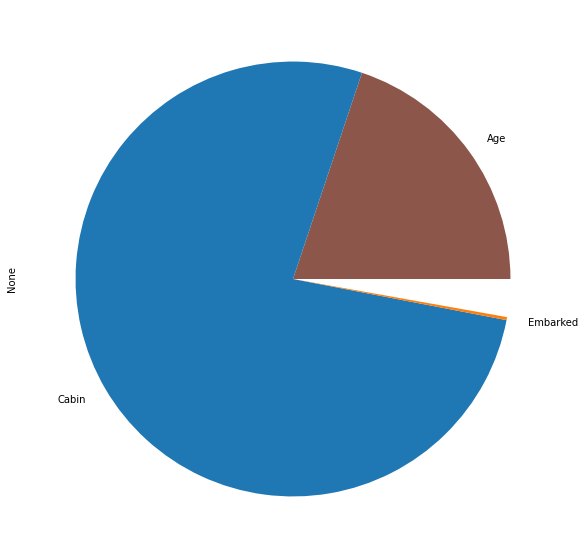

In [5]:
# proportion de valeurs manquantes
plt.figure(figsize=(25,10))
(train.isna().sum()/train.shape[0]).plot.pie()

In [6]:
# les differents types 
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

# Conversion des "int" en "object"

In [7]:
def Convertion(data,categoriel) : 
    for col in categoriel : 
        data[col] = data[col].astype("object")
    return data
categorie = ["Survived","Pclass",]
data = Convertion(train,categorie)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    object 
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(3), object(7)
memory usage: 83.7+ KB


In [9]:
data["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [10]:
def Input_missing_values(data) :
    for col in data.columns : 
        if(data[col].dtype is float) or (data[col].dtype is int) :
            data[col] = data[col].fillna(data[col].median())
        if(data[col].dtype == object) :
            data[col] = data[col].fillna(data[col].mode()[0])
    return data

a = Input_missing_values(data)

In [11]:
data["Age"] = data["Age"].fillna(data["Age"].mode()[0])

In [12]:
a.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [13]:
def parse_model(x,use_columns) :
    if "Survived" not in x.columns :
        raise ValueError("target column survived should belong to data")
    target = x["Survived"] 
    x = x[use_columns]
    return x,target

model_cols1 = ["SibSp","Parch","Fare"]
X,y = parse_model(x = data.copy(), use_columns = model_cols1)

# Modelisation

In [14]:
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import  LogisticRegression

In [15]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)

logit = LogisticRegression().fit(x_train,y_train)
pred = logit.predict(x_train)
print("accuracy en train  :" ,accuracy_score(y_train,pred))

pred_test = logit.predict(x_test)
print("accuracy en test  :" ,accuracy_score(y_test,pred_test))

accuracy en train  : 0.6643258426966292
accuracy en test  : 0.6983240223463687


# Evaluation en validation croisée

In [16]:
def compute_score(cfl,x,y,cv=5) :
    xval = cross_val_score(cfl,x,y,cv = 5)
    print("Accuracy : %0.2f(*/- %0.2f)"%(xval.mean(),xval.std()*2))
    return xval
compute_score(logit,x_train,y_train)

Accuracy : 0.67(*/- 0.04)


array([0.63636364, 0.65734266, 0.67605634, 0.69014085, 0.67605634])

# Amelioration de la performance du model

In [17]:
survived = data[data.Survived == 1]
dead = data[data.Survived == 0]
dead["Pclass"]

0      3
4      3
5      3
6      1
7      3
      ..
884    3
885    3
886    2
888    3
890    3
Name: Pclass, Length: 549, dtype: int64

Populating the interactive namespace from numpy and matplotlib


/opt/conda/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['test']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


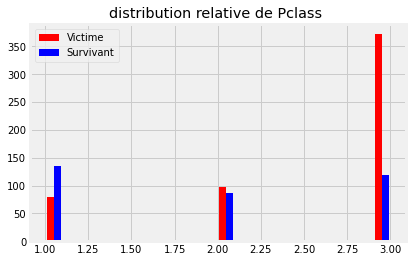

In [18]:
plt.figure(figsize = (25,10))
from matplotlib import style
style.use("fivethirtyeight")
%matplotlib inline
%pylab inline

def plot_hist(feature,bins = 20) :
    x1 = np.array(dead[feature].dropna())
    x2 = np.array(survived[feature].dropna())
    plt.hist([x1,x2],label = ["Victime","Survivant"],bins=bins, color =['r','b'])
    plt.legend(loc = "upper left")
    plt.title("distribution relative de %s " %feature)
    plt.show()  
plot_hist("Pclass")     

Nous constactons que la variable classe a un impacte sur la survie

In [19]:
data1 = pd.get_dummies(data,columns=["Pclass"])
data1.head()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Pclass_1,Pclass_2,Pclass_3
0,1,0,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0
2,3,1,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,0
4,5,0,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S,0,0,1


In [20]:
model_cols2 = ["SibSp","Parch","Fare","Pclass_1","Pclass_2","Pclass_3"]
X1,y1 = parse_model(x = data1.copy(), use_columns = model_cols2)

In [21]:
x_train1,x_test1,y_train1,y_test1 = train_test_split(X1,y1,test_size = 0.2,random_state = 0)

logit1 = LogisticRegression().fit(x_train1,y_train1)
pred1 = logit1.predict(x_train1)
print("accuracy en train  :" ,accuracy_score(y_train1,pred1))

pred_test1 = logit1.predict(x_test1)
print("accuracy en test  :" ,accuracy_score(y_test1,pred_test1))

accuracy en train  : 0.6839887640449438
accuracy en test  : 0.7150837988826816


# Deuxieme A melioration

In [22]:
(data1["Sex"].value_counts()/data1.shape[0])

male      0.647587
female    0.352413
Name: Sex, dtype: float64

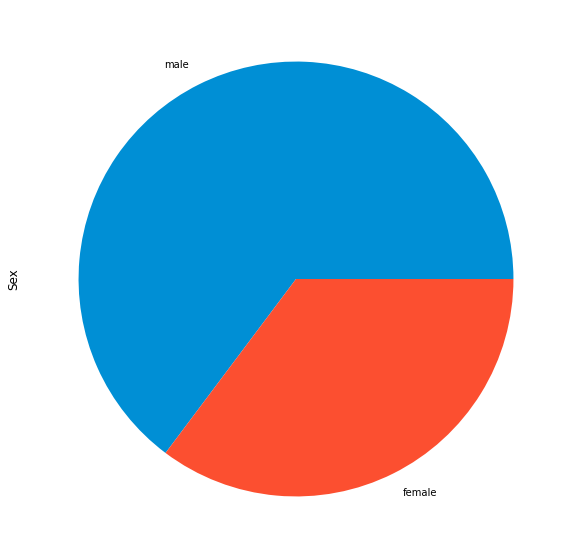

In [23]:
# proportion de femme et d'homme
plt.figure(figsize=(25,10))
(data1["Sex"].value_counts()/data1.shape[0]).plot.pie()
# il y a 65% d'homme et 35% de femme dans le bateau

# Est ce que la survie est-elle liée au Sexe?

In [24]:
pd.crosstab(data1["Sex"],data1["Survived"])

Survived,0,1
Sex,,
female,81,233
male,468,109


il y plus d'homme mort que de femme morte . donc on peut dire que la survie est liée au sexe

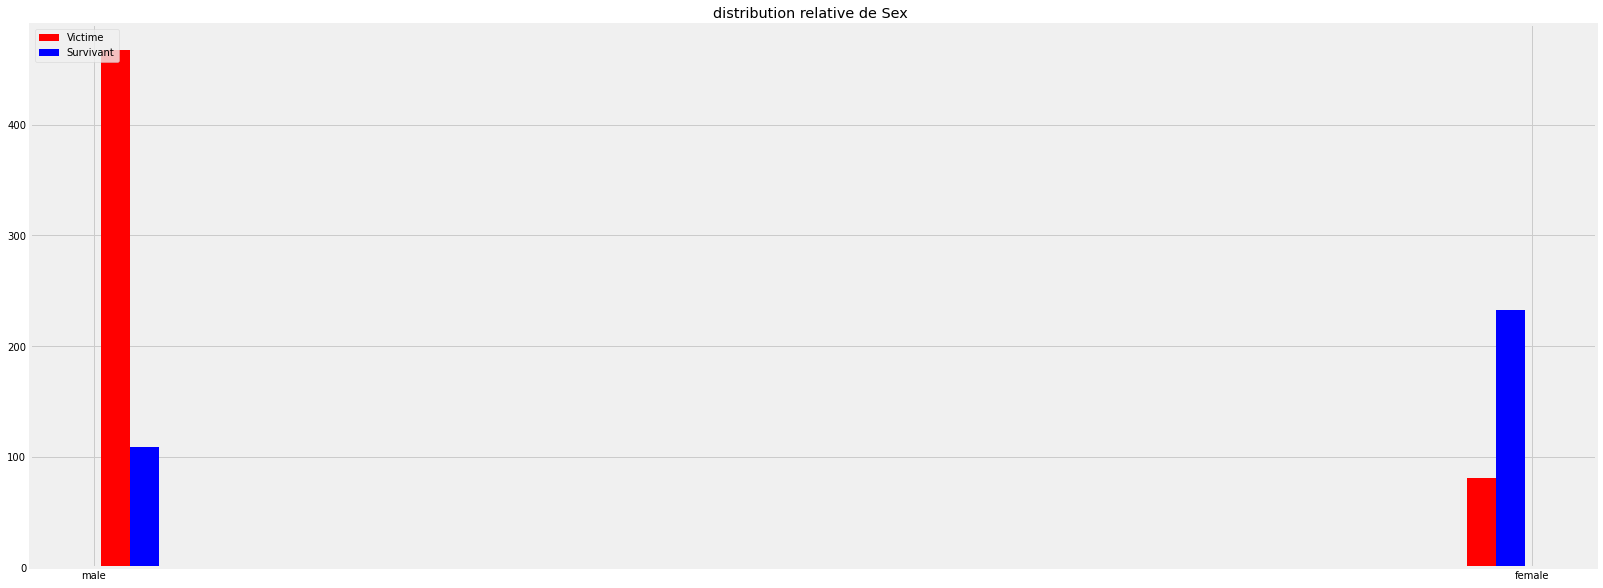

In [25]:
plt.figure(figsize=(25,10))
plot_hist("Sex") 

Nous constactons que le sexe a bien un impacte sur la survie. 

In [26]:
data2 = pd.get_dummies(data1,columns=["Sex"])
data2.head()

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,B96 B98,S,0,0,1,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,1,0,0,1,0
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S,0,0,1,1,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,1,0,0,1,0
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,B96 B98,S,0,0,1,0,1


In [27]:
model_cols2 = ["SibSp","Parch","Fare","Pclass_1","Pclass_2","Pclass_3","Sex_female","Sex_male"]
X2,y2 = parse_model(x = data2.copy(), use_columns = model_cols2)

In [28]:
x_train2,x_test2,y_train2,y_test2 = train_test_split(X2,y2,test_size = 0.2,random_state = 0)

logit2 = LogisticRegression().fit(x_train2,y_train2)
pred2 = logit2.predict(x_train2)
print("accuracy en train  :" ,accuracy_score(y_train2,pred2))

pred_test2 = logit2.predict(x_test2)
print("accuracy en test  :" ,accuracy_score(y_test2,pred_test2))

accuracy en train  : 0.797752808988764
accuracy en test  : 0.7988826815642458


Notre modele a été amelioré

# Est ce que l'âge a un impact sur la survie?

In [29]:
data2["Age"] = data2["Age"].fillna(data2["Age"].mode()[0])

In [30]:
pd.crosstab(data2["Age"],data2["Survived"]).T

Age,0.42,0.67,0.75,0.83,0.92,1.00,2.00,3.00,4.00,5.00,...,62.00,63.00,64.00,65.00,66.00,70.00,70.50,71.00,74.00,80.00
Survived,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,2,7,1,3,0,...,2,0,2,3,1,2,1,2,1,0
1,1,1,2,2,1,5,3,5,7,4,...,2,2,0,0,0,0,0,0,0,1


In [31]:
data2["Age"].isna().sum()

0

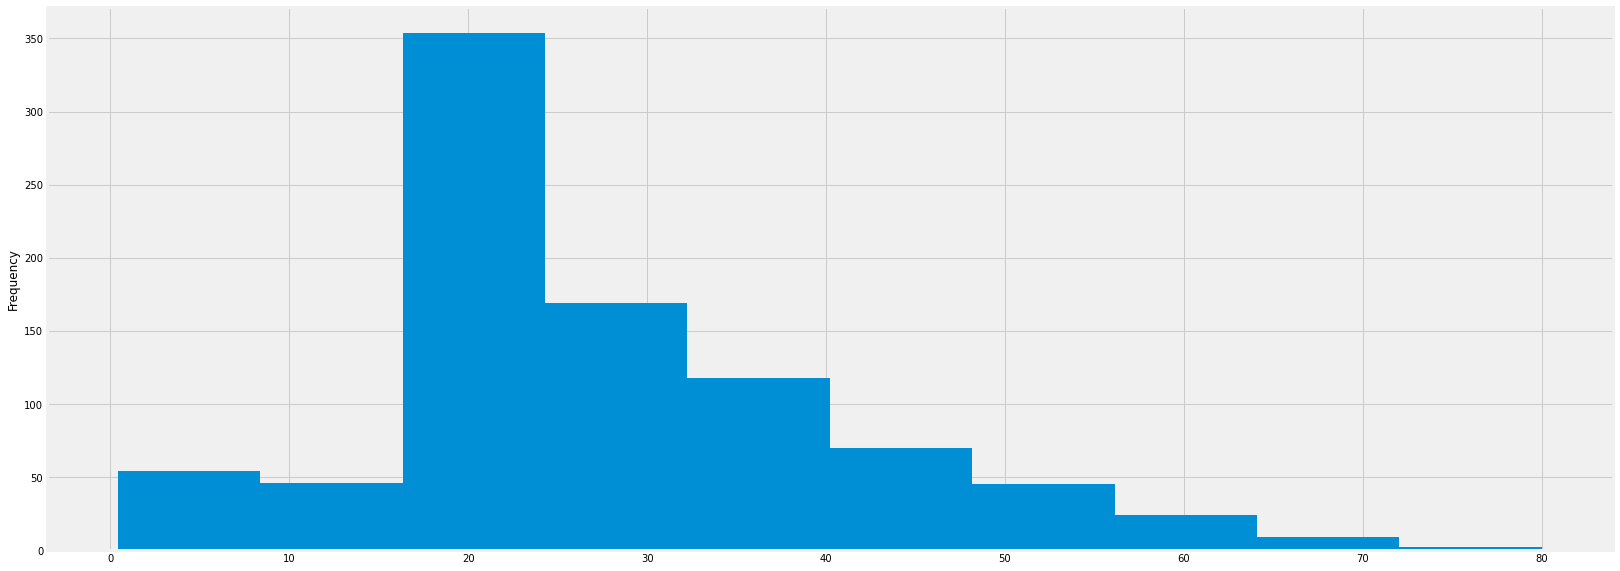

In [32]:
plt.figure(figsize = (25,10))
data2["Age"].plot.hist()

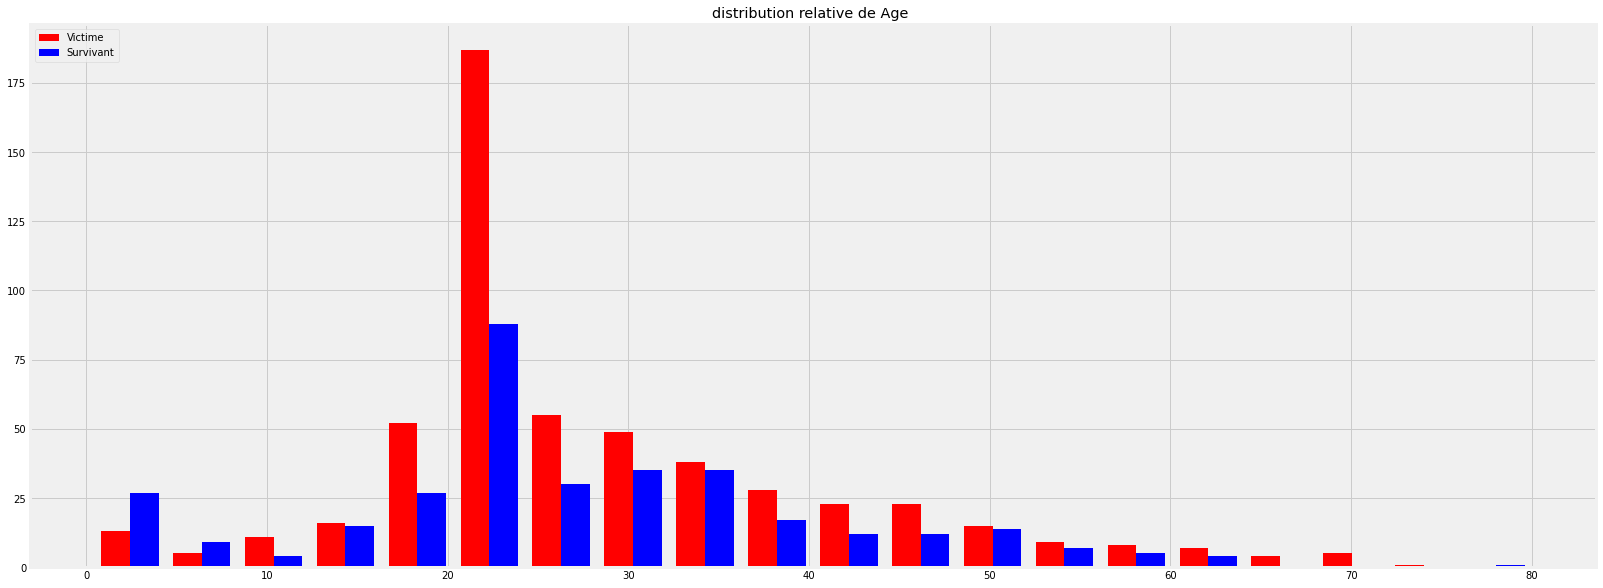

In [33]:
plt.figure(figsize=(25,10))
plot_hist("Age")

In [34]:
def New_col(data,col) : 
    for i in data[col] :
        if i <= 9 :
            data[col] = 1
        else :
            data[col] = 0
    return data    

In [35]:
data3 = New_col(data2,"Age")
data3

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male
0,1,0,"Braund, Mr. Owen Harris",0,1,0,A/5 21171,7.2500,B96 B98,S,0,0,1,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,71.2833,C85,C,1,0,0,1,0
2,3,1,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,7.9250,B96 B98,S,0,0,1,1,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,53.1000,C123,S,1,0,0,1,0
4,5,0,"Allen, Mr. William Henry",0,0,0,373450,8.0500,B96 B98,S,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,"Montvila, Rev. Juozas",0,0,0,211536,13.0000,B96 B98,S,0,1,0,0,1
887,888,1,"Graham, Miss. Margaret Edith",0,0,0,112053,30.0000,B42,S,1,0,0,1,0
888,889,0,"Johnston, Miss. Catherine Helen ""Carrie""",0,1,2,W./C. 6607,23.4500,B96 B98,S,0,0,1,1,0
889,890,1,"Behr, Mr. Karl Howell",0,0,0,111369,30.0000,C148,C,1,0,0,0,1


In [36]:
survived = data3[data3.Survived == 1]
dead = data3[data3.Survived == 0]

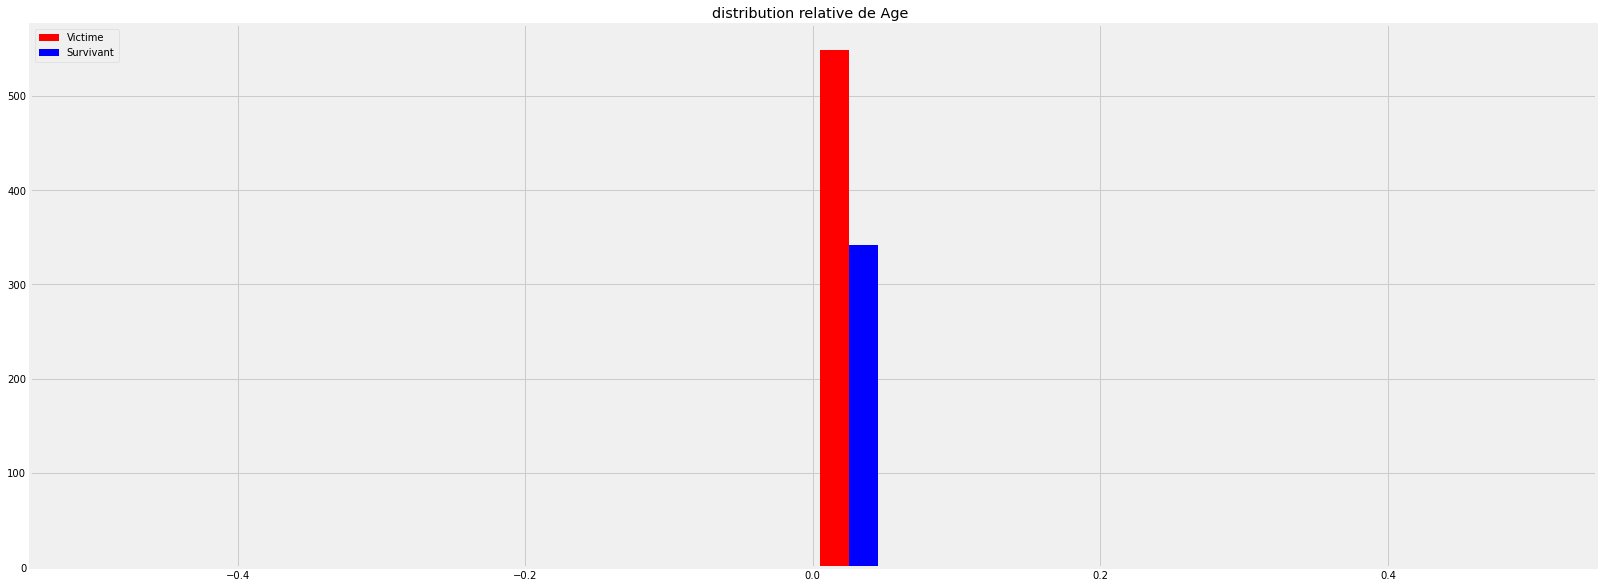

In [37]:
plt.figure(figsize=(25,10))
plot_hist("Age")

In [38]:
model_cols3 = ["SibSp","Parch","Fare","Pclass_1","Pclass_2","Pclass_3","Sex_female","Sex_male","Age"]
X3,y3 = parse_model(x = data3.copy(), use_columns = model_cols3)

In [39]:
x_train3,x_test3,y_train3,y_test3 = train_test_split(X3,y3,test_size = 0.2,random_state = 0)

logit3 = LogisticRegression().fit(x_train3,y_train3)
pred3 = logit3.predict(x_train3)
print("accuracy en train  :" ,accuracy_score(y_train3,pred3))

pred_test3 = logit3.predict(x_test3)
print("accuracy en test  :" ,accuracy_score(y_test3,pred_test3))

accuracy en train  : 0.797752808988764
accuracy en test  : 0.7988826815642458


Pas d'amelioration 

# Est ce que cela est dû au titre?

In [40]:
data2["Titre"] = data2["Name"].apply(lambda x : x.split(".")[1])
data2.dtypes

PassengerId      int64
Survived         int64
Name            object
Age              int64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
Pclass_1         uint8
Pclass_2         uint8
Pclass_3         uint8
Sex_female       uint8
Sex_male         uint8
Titre           object
dtype: object

In [41]:
data2 =  pd.get_dummies(data2,columns=["Titre"])
data2

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,...,Titre_ William Rowe,Titre_ William Thomas,Titre_ William Thompson,Titre_ William Thompson (Edith Junkins),Titre_ William Thornton II,Titre_ Wyckoff,Titre_ Yoto,Titre_ Youssef,Titre_ Yousseff,Titre_ of (Lucy Noel Martha Dyer-Edwards)
0,1,0,"Braund, Mr. Owen Harris",0,1,0,A/5 21171,7.2500,B96 B98,S,...,0,0,0,0,0,0,0,0,0,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,71.2833,C85,C,...,0,0,0,0,0,0,0,0,0,0
2,3,1,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,7.9250,B96 B98,S,...,0,0,0,0,0,0,0,0,0,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,53.1000,C123,S,...,0,0,0,0,0,0,0,0,0,0
4,5,0,"Allen, Mr. William Henry",0,0,0,373450,8.0500,B96 B98,S,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,"Montvila, Rev. Juozas",0,0,0,211536,13.0000,B96 B98,S,...,0,0,0,0,0,0,0,0,0,0
887,888,1,"Graham, Miss. Margaret Edith",0,0,0,112053,30.0000,B42,S,...,0,0,0,0,0,0,0,0,0,0
888,889,0,"Johnston, Miss. Catherine Helen ""Carrie""",0,1,2,W./C. 6607,23.4500,B96 B98,S,...,0,0,0,0,0,0,0,0,0,0
889,890,1,"Behr, Mr. Karl Howell",0,0,0,111369,30.0000,C148,C,...,0,0,0,0,0,0,0,0,0,0


In [42]:
data2.dtypes

PassengerId                                   int64
Survived                                      int64
Name                                         object
Age                                           int64
SibSp                                         int64
                                              ...  
Titre_ Wyckoff                                uint8
Titre_ Yoto                                   uint8
Titre_ Youssef                                uint8
Titre_ Yousseff                               uint8
Titre_ of (Lucy Noel Martha Dyer-Edwards)     uint8
Length: 814, dtype: object